# **Unsupervised learning**

## Import All Packages
Add all imports needed for this notebook to run

In [ ]:
import numpy as np
import numpy.linalg
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from numpy.ma.core import size
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import silhouette_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Text Clustering And Dimension Reduction

In this exercise you will cluster fake news using `k-means` and visualize the clustering using PCA.

**Import the Fake News Dataset from Kaggle**

Navigate to https://www.kaggle.com. Then go to the [Account tab of your user profile](https://www.kaggle.com/me/account) and select Create API Token. This will trigger the download of kaggle.json, a file containing your API credentials.

Then run the cell below and click the upload button to upload kaggle.json to your Colab runtime.

After uploading the kaggle.json the fake news dataset will be copy to the enviroment in the '/content' directory. You will see the two files 'Fake.csv' and 'True.csv'.

For more about the dataset you can read [here](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset).

In [ ]:
from google.colab import files

# upload kaggle.json file using user prompt
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

# download the dataset
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

# extract the files
!unzip '/content/fake-and-real-news-dataset.zip'

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes
 95% 39.0M/41.0M [00:01<00:00, 38.3MB/s]
100% 41.0M/41.0M [00:01<00:00, 26.1MB/s]
Archive:  /content/fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


## 1. Read the csv files and create one single dataframe (5 points)

*   Create a dataframe which is the join of the two files 'Fake.csv' and 'True.csv'.
*   Extract the 'text' column from each dataframe (droping title, subject and date columns).
*   Create a single dataframe containing a text column and a label column (fake=0, real=1).

In [ ]:
#create dataframe
fake_df = pd.read_csv('/content/Fake.csv')
true_df = pd.read_csv('/content/True.csv')

#add label column
fake_df["label"] = 0
true_df["label"] = 1

#join the two dataframe into one
merge_df = pd.concat([fake_df, true_df])
merge_df = merge_df[['text','label']]
merge_df

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


## 2. Cluster the samples into 2 clusters (real and fake) (15 points)

*   Generate TF-IDF features by applying the TfidfVectorizer preprocessor using 1000 features (`max_features=1000`) and remove English stop words.
* Scale the data.
*    Apply k-Means algorithm on the TF-IDF features using n_clusters=2.

In [ ]:
#create TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english') #create vectoraizer variable
vectors = vectorizer.fit_transform(merge_df['text']) # Learn vocabulary and idf of the dataframe, return document-term matrix.
feature_names = vectorizer.get_feature_names() # return a list of all feature names.
dense = vectors.todense() # return a dense matrix representation of this matrix.
denselist = dense.tolist() # convert to list
df = pd.DataFrame(denselist, columns=feature_names) #create new dataframe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#scale the data
Standard_scaler = preprocessing.StandardScaler() # create standard scaler variable
scaled_array = Standard_scaler.fit_transform(df) # input: dataframe, output: array of the value after standartizaion
df_standardization = pd.DataFrame(scaled_array, columns=feature_names) #create new dataframe after scaling the data

In [ ]:
#k-Means algorithm on the TF-IDF features using n_clusters=2.
clusterer = KMeans(n_clusters=2, random_state=10) # create kmeans variable with k=2
cluster_labels = clusterer.fit_predict(df_standardization) # activate kmeans on the dataframe and get the predicted labels

# The calculated centers
centers = clusterer.cluster_centers_ # return array of all clusters centers
centers

array([[-1.11560531e-01, -1.71388978e-02,  5.09306474e-05, ...,
         1.44279850e-02,  1.24708643e-01,  1.65682792e-01],
       [ 8.88734317e-02,  1.36535085e-02, -4.05733225e-05, ...,
        -1.14938906e-02, -9.93477257e-02, -1.31989316e-01]])

## 3. Visualize using scatter plot (15 points)
The data is high dimensional, so for visualization purpose, we will perform a dimensionality reduction using PCA.

* Apply PCA
*   Visualize the clustering in 2d using first two PCs.
*   Visualize the clustering in 3d using first three PCs.

Notes:

*   In clustering visualization it's important to also visualize the centroids.
* Visualize using matplotlib scatter function. It can be used to plot 2D or 3D scatter plots.
* Color the points according to the true labels.

In [ ]:
#PCA algoritm using two PCs
pca = PCA(n_components=2) #create PCA variable for 2d
projected = pca.fit_transform(df_standardization) # input: dataframe, output: array after dimensionality reduction
projected_centroinds = pca.fit_transform(centers) # computing pca on the clusters centers

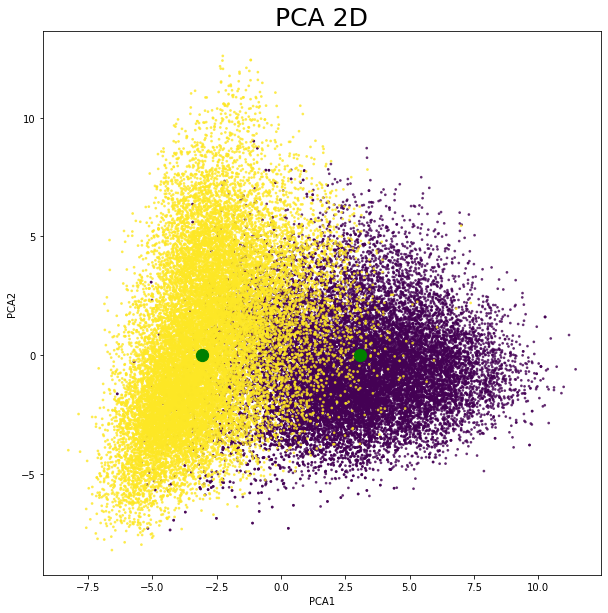

In [ ]:
#plot to PCA 2D
plt.figure(figsize=(10, 10))
plt.scatter(projected[:,0], projected[:,1], c=merge_df['label'], s=3, alpha=0.7)
plt.scatter(projected_centroinds[:,0], projected_centroinds[:,1], s=150, c=['green'])
plt.title("PCA 2D", size=25)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [ ]:
#PCA algoritm using three PCs
pca = PCA(n_components=3) #create PCA variable for 3d
projected1 = pca.fit_transform(df_standardization) # input: dataframe, output: array after dimensionality reduction
projected1

array([[ 3.66438262, -0.75198528, -0.42267795],
       [ 2.05955923,  3.02211974, -2.70289529],
       [ 3.37585905, -2.71600393, -2.01952872],
       ...,
       [-0.75552284, -0.02146974,  3.86370428],
       [-4.02969762, -1.83269871, -3.25642691],
       [-4.98189755, -0.02804613, -0.2932021 ]])

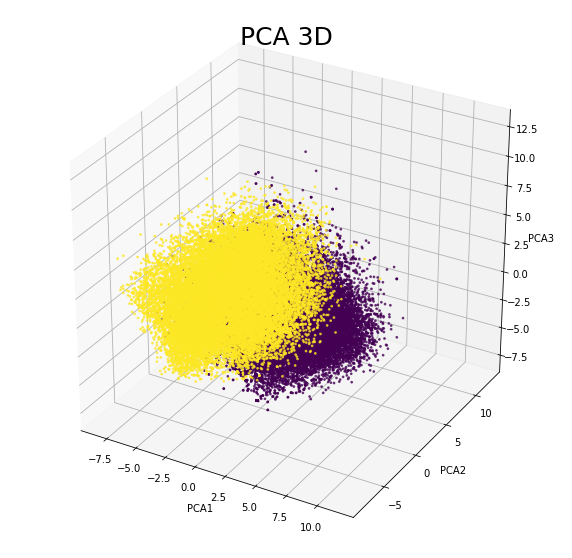

In [ ]:
#plot to PCA 3D
fig=plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter(projected1[:,0], projected1[:,1], projected1[:,2], c=merge_df['label'],s=3, alpha=0.7)
plt.title("PCA 3D", size=25)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.show()

## 4. Performance evaluation (15 points)
### How did our clustering perform against the real labels?

We do have the true lables (fake/real), but we don't know which cluster correspond to which label. Therefore, we check the two options:

*   Define cluster 1 as fake and cluster 2 as real. What is the accuracy?
*   Define cluster 1 as true and cluster 2 as fake. What is the accuracy?

In [ ]:
#cluster0 - fake
#cluster1 - real
actual = merge_df['label'] # array of true labels
pred = cluster_labels # array of predicted labels
accuracy = balanced_accuracy_score(actual, pred) #input: array of true labels, array of predicted labels, output: accurecy(float)
print("by defining cluster 1 as fake and cluster 2 as real, accuracy =",accuracy)

#cluster1 - fake
#cluster0 - real
pred = [1 if i==0 else 0 for i in cluster_labels] # switch between the predicted labels
accuracy = balanced_accuracy_score(actual, pred) #input: array of true labels, array of predicted labels, output: accurecy(float)
print("by defining cluster 1 as true and cluster 2 as fake, accuracy =",accuracy)

by defining cluster 1 as fake and cluster 2 as real, accuracy = 0.8743224450099608
by defining cluster 1 as true and cluster 2 as fake, accuracy = 0.12567755499003916


## 5. Find optimal `k` (10 points)
What is the best k for clustering?

* Cluster using a range of `k` (up to 20) and compare the SSD and the Silhouette values for every k.
* Plot SSD vs. k and Silhouette score vs. k.

Notes:
* You can get the SSD of a clustering using the `inertia_` attribute of the model.
* Silhouette score using `silhouette_score` function from `sklearn.metrics`. This function accept the model and the data.
* Computing Silhouette may takes long time. Estimate the Silhouette using a sample of 300 samples uisng the argument `sample_size=300`.

In [ ]:
silhouette = [] # list to hold all the sihouette scores
SDD = [] #list to hold all the ssd value
kmeans_ssd1 = KMeans(n_clusters = 1, random_state = 10) # create kmeans variable with k=1
kmeans_ssd1.fit_predict(df_standardization) # activate kmeans on the dataframe and get the predicted labels
SDD.append(kmeans_ssd1.inertia_) # inertia_ :return sum of squered distance (float)
for i in range(2, 21):
  kmeans = KMeans(n_clusters = i, random_state = 10) # create kmeans variable with k=2-20
  cluster_labels1 = kmeans.fit_predict(df_standardization) # activate kmeans on the dataframe and get the predicted labels
  SDD.append(kmeans.inertia_) # inertia_ :return sum of squered distance (float)
  score = silhouette_score(df_standardization, cluster_labels1, sample_size=300) # input: dataframe, predicted labels, output: sihouette score
  silhouette.append(score)

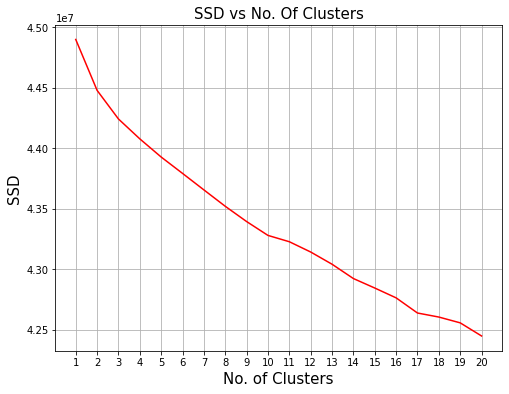

In [ ]:
# plot SSD values vs k value
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1, 21), SDD, color='red')
plt.xlabel('No. of Clusters', fontsize=15)
plt.ylabel('SSD', fontsize=15)
plt.xticks(np.arange(1,21,1))
plt.title('SSD vs No. Of Clusters', fontsize=15)
plt.grid()
plt.show()

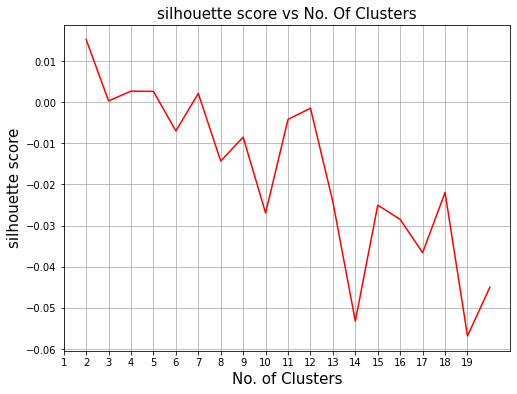

In [ ]:
# plot silhouette score vs k value
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(2, 21), silhouette, color='red')
plt.xlabel('No. of Clusters', fontsize=15)
plt.ylabel('silhouette score', fontsize=15)
plt.xticks(np.arange(1,20,1))
plt.title('silhouette score vs No. Of Clusters', fontsize=15)
plt.grid()
plt.show()

### 6. What is the optimal k for clustering? (10 points)

* Explain.
* If optimal k!=2 what can be a good explanation for this?

**Answer:**
It can be seen that in the graph describing the relationship
between the silhouette and the number of clusters, for k=2 it is obtained that the silhouette coefficient is closest to 1.
In addition, it can be seen in the graph describing the relationship between the SSD and the number of clusters that the point where SSD starts to flatten out and forming an elbow is at k=2

# 7. PCA then k-means (10 points)

1.   List item
2.   List item


This time, lets try to change the order.
1. Generate TF-IDF 1000 features
2. Run PCA (using all dimenssions)
3. Run k-means
4. Plot 2D and 3D scatter plots
5. Estimate the accuracy according to true labels.
6. Explain how is it compared to the previous approach, where clustering is performed w/o PCA.

Note:
* When you compute the PCA, don't limit to first PCs, but use all of them.

In [ ]:
#for first run PCA
pca_ = PCA(n_components=1000) # create pca variable with all dimention(1000)
projected_ = pca.fit_transform(df_standardization) # input: dataframe, output: array after dimensionality reduction

In [ ]:
#run k-Means algorithm on the TF-IDF features using n_clusters=2.
clusterer_ = KMeans(n_clusters=2, random_state=10) #create kmeans variable with k=2
cluster_labels_ = clusterer.fit_predict(projected_) # activate kmeans on the dataframe and get the predicted labels

# The calculated centers
centers_ = clusterer.cluster_centers_ # return array of all clusters centers

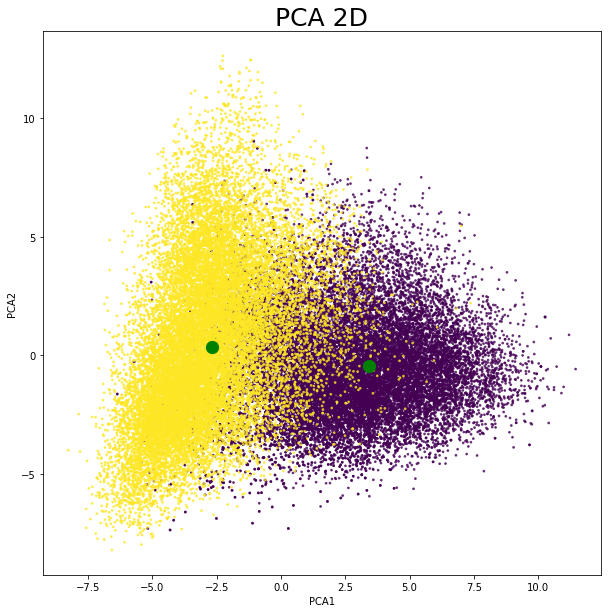

In [ ]:
#Plot 2D
plt.figure(figsize=(10, 10))
plt.scatter(projected_[:,0], projected_[:,1], c=merge_df['label'], s=3, alpha=0.7)
plt.scatter(centers_[:,0], centers_[:,1], s=150, c=['green'])
plt.title("PCA 2D", size=25)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

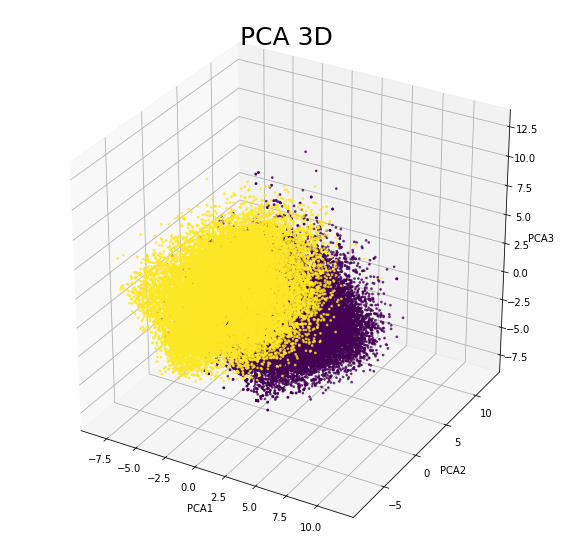

In [ ]:
#plot to PCA 3D
fig=plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter(projected_[:,0], projected_[:,1], projected_[:,2], c=merge_df['label'],s=3, alpha=0.7)
plt.title("PCA 3D", size=25)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.show()

In [ ]:
#cluster0 - fake
#cluster1 - real
actual = merge_df['label'] # array of true labels
pred = cluster_labels_ # array of predicted labels
accuracy_ = balanced_accuracy_score(actual, pred) # input: array of true labels, array of predicted labels, output: accurecy(float)
print("by defining cluster 1 as fake and cluster 2 as real, accuracy =",accuracy_)

#cluster1 - fake
#cluster0 - real
pred = [1 if i==0 else 0 for i in cluster_labels_] # switch between the predicted labels
accuracy_ = balanced_accuracy_score(actual, pred) # input: array of true labels, array of predicted labels, output: accurecy(float)
print("by defining cluster 1 as true and cluster 2 as fake, accuracy =",accuracy_)

by defining cluster 1 as fake and cluster 2 as real, accuracy = 0.868870987531001
by defining cluster 1 as true and cluster 2 as fake, accuracy = 0.1311290124689989


**Conclusion:**
It can be seen that the accuracy didn't changed from the previous approach where we first did clustering and then PCA.
Therefore it can be concluded that changing the order of the methods doesn't affect the accuracy of the model

# MNIST clustering (10 points)
Redo the same analysis, but this time using the MNIST data set. Notice that this time there are actually 10 'true' clusters.

1. What is the accuracy of the clustering when using k=10? \\
   * When for computing the accuracy of 10 classes, first you need to define what is the label of each cluster. Do that by majority votes. In theory, you may get two or more clusters with the same labels. We will ignore that for now. Meaning that you don't need to bother in case there are two clusters with the same label according to the majority vote. Simply count what is the fraction of 'other' digits in each cluster.
2. What is the optimal k?
3. How do the results changes if you first run PCA?

In [ ]:
from google.colab import files

# upload kaggle.json file using user prompt
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

# download the dataset
!kaggle datasets download -d oddrationale/mnist-in-csv

# extract the files
!unzip '/content/mnist-in-csv.zip'


Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes
 72% 11.0M/15.2M [00:00<00:00, 21.8MB/s]
100% 15.2M/15.2M [00:00<00:00, 19.2MB/s]
Archive:  /content/mnist-in-csv.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


In [ ]:
#load the mnist data
mnist_df = pd.read_csv('/content/mnist_train.csv')

In [ ]:
#kmeans for k=10
kmeans_mnist = KMeans(n_clusters=10, random_state=10) # create kmeans variable with k=10
cluster_labels_mnist = kmeans_mnist.fit_predict(mnist_df.iloc[:,1:]) # activate kmeans on the dataframe and get the predicted labels
cluster_labels_mnist

array([7, 6, 9, ..., 7, 2, 2], dtype=int32)

In [ ]:
#create dataframe wuth true and predicted labels
mnist_label_df = pd.DataFrame()
mnist_label_df['true label'] = mnist_df['label']
mnist_label_df['pred label'] = cluster_labels_mnist


In [ ]:
#define cluster label by majority voting
for label in range(10):
  tmp_df = mnist_label_df[mnist_label_df["true label"] == label] # create a temporary dataframe for each true label
  max_val_pred = tmp_df['pred label'].value_counts().index[0] # value_counts- count number of occurences for each predicted label, return in descending order
  mnist_label_df['pred label'] = mnist_label_df['pred label'].apply(lambda x: label if x == max_val_pred else x) # change predicted label in the original dataframe


In [ ]:
#calculate accuracy
actual = mnist_label_df['true label'] # array of true label
pred = mnist_label_df['pred label'] # array of predicted label
accuracy = balanced_accuracy_score(actual, pred) # input: array of true label, array of predicted label, output: accurecy(float)
print("by defining cluster label by majority voting, accuracy =",accuracy)

by defining cluster label by majority voting, accuracy = 0.2604298864930622


In [ ]:
#find the optimal k
silhouette_mnist = [] # list to hold all silhouette scores
SSD_mnist = [] # list to hold all SSD value
mnist_kmeans_ssd1 = KMeans(n_clusters = 1, random_state = 10) # create kmeans variable with k=1
mnist_kmeans_ssd1.fit_predict(mnist_df.iloc[:,1:]) # activate kmeans on the dataframe and get the predicted labels
SSD_mnist.append(mnist_kmeans_ssd1.inertia_) # inetia_:return sum of squered distance (float)
for i in range(2, 21):
  kmeans_mnist_ = KMeans(n_clusters = i, random_state = 10) # create kmeans variable with k=2-20
  cluster_labels_mnist_ = kmeans_mnist_.fit_predict(mnist_df.iloc[:,1:]) #  activate kmeans on the dataframe and get the predicted labels
  SSD_mnist.append(kmeans_mnist_.inertia_) # inetia_:return sum of squered distance (float)
  score = silhouette_score(mnist_df.iloc[:,1:], cluster_labels_mnist_, sample_size=300) # input: dataframe, predicted labels, output: sihouette score
  silhouette_mnist.append(score)

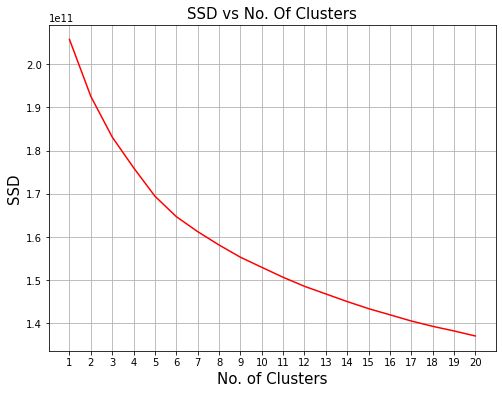

In [ ]:
# plot SSD value vs k value
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1, 21), SSD_mnist, color='red')
plt.xlabel('No. of Clusters', fontsize=15)
plt.ylabel('SSD', fontsize=15)
plt.xticks(np.arange(1,21,1))
plt.title('SSD vs No. Of Clusters', fontsize=15)
plt.grid()
plt.show()

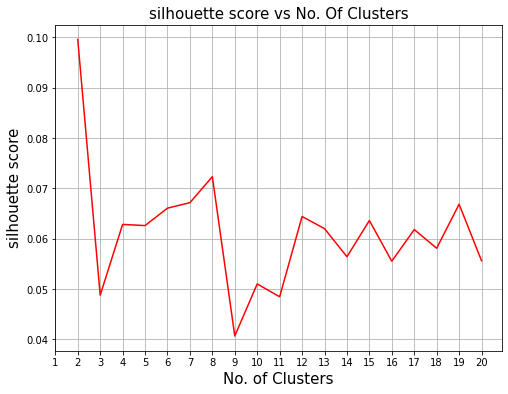

In [ ]:
# plot silhouette score vs k value
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(2, 21), silhouette_mnist, color='red')
plt.xlabel('No. of Clusters', fontsize=15)
plt.ylabel('silhouette score', fontsize=15)
plt.xticks(np.arange(1,21,1))
# plt.ylim(-1,1)
plt.title('silhouette score vs No. Of Clusters', fontsize=15)
plt.grid()
plt.show()

**Answer:** It can be seen that in the graph describing the relationship between the silhouette and the number of clusters that the silhouette coefficients are very close to zero and move around it, this means that the sample is very close to the neighboring clusters. In addition, it can be seen in the graph describing the relationship between the SSD and the number of clusters that there is no point where SSD starts to flatten out and forming an elbow.
Moreover, the results in the graphs indeed reinforce the low accuracy calculated for k=10.

In [ ]:
#scale the data
mnist_df1 = mnist_df.iloc[:,1:]

In [ ]:
#for first run PCA
pca = PCA(n_components=784) # create PCA variable with all dinemtions(784)
projected_mnist = pca.fit_transform(mnist_df1) # input: dataframe, output: array after dimensionality reduction

In [ ]:
#run k-Means algorithm on the TF-IDF features using n_clusters=2.
mnist_kmeans1 = KMeans(n_clusters=10, random_state=10) # create kmens variable with k=10
cluster_labels_1 = mnist_kmeans1.fit_predict(projected_mnist) # activate kmeans on the dataframe and get the predicted labels

# The calculated centers
centers_mnist = mnist_kmeans1.cluster_centers_ # return array of all clusters centers

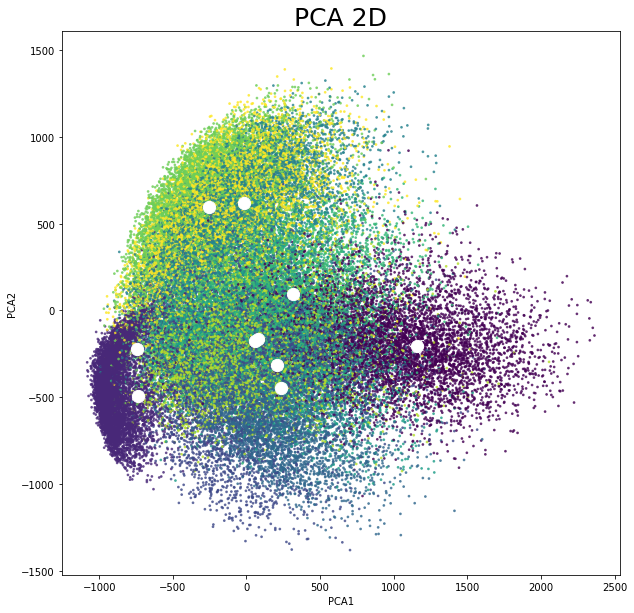

In [ ]:
#plot to PCA 2D
plt.figure(figsize=(10, 10))
plt.scatter(projected_mnist[:,0], projected_mnist[:,1], c=mnist_label_df['true label'], s=3, alpha=0.7)
plt.scatter(centers_mnist[:,0], centers_mnist[:,1], s=150, c=['white'])
plt.title("PCA 2D", size=25)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

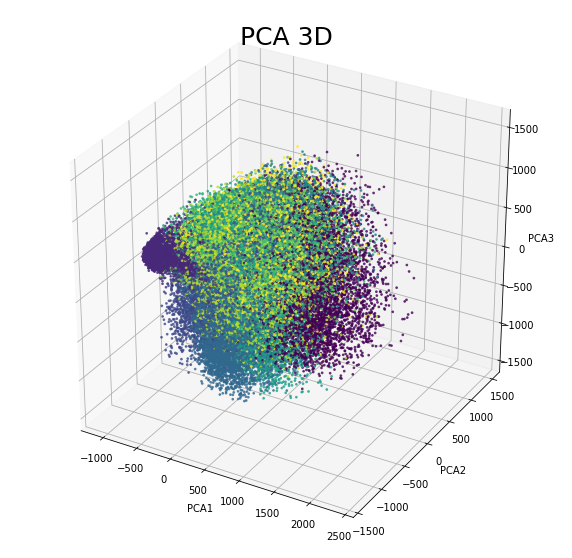

In [ ]:
#plot to PCA 3D
fig=plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter(projected_mnist[:,0], projected_mnist[:,1], projected_mnist[:,2], c=mnist_label_df['true label'],s=3, alpha=0.7)
plt.title("PCA 3D", size=25)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.show()

In [ ]:
#create dataframe wuth true and predicted labels
mnist_label_df1 = pd.DataFrame()
mnist_label_df1['true label'] = mnist_df['label']
mnist_label_df1['pred label'] = cluster_labels_1
mnist_label_df1

,true label,pred label
0,5,7
1,0,6
2,4,9
3,1,4
4,9,1
...,...,...
59995,8,7
59996,3,7
59997,5,7
59998,6,2


In [ ]:
#define cluster label by majority voting
for label in range(10):
  tmp_df = mnist_label_df1[mnist_label_df1["true label"] == label] # create a temporary dataframe for each true label
  max_val_pred = tmp_df['pred label'].value_counts().index.tolist()[0] # value_counts- count number of occurences for each predicted label, return in descending order
  mnist_label_df1['pred label'] = mnist_label_df1['pred label'].apply(lambda x: label if x == max_val_pred else x) # change predicted label in the original dataframe


In [ ]:
#calculate accuracy
actual = mnist_label_df1['true label'] # array of true label
pred = mnist_label_df1['pred label'] # array of predicted label
accuracy = balanced_accuracy_score(actual, pred) # input: array of true label, array of predicted label, output: accurecy(float)
print("by computing pca anf defining cluster label by majority voting, accuracy =",accuracy)

by computing pca anf defining cluster label by majority voting, accuracy = 0.2604298864930622


**Conclusion:**
It can be seen that the accuracy didn't changed from the previous approach where we first did clustering and then PCA.
Therefore it can be concluded that changing the order of the methods doesn't affect the accuracy of the model.


# Compute projection (10 points)
**Notice:** No code required in this section.

Given the next PCA projection matrix
$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$
And the correspoding egienvalues
$(5, -1)$

Compute the projection to one dimension of the next two vectors:
\begin{pmatrix}
1 & 3
\end{pmatrix}
\begin{pmatrix}
3 & 7
\end{pmatrix}

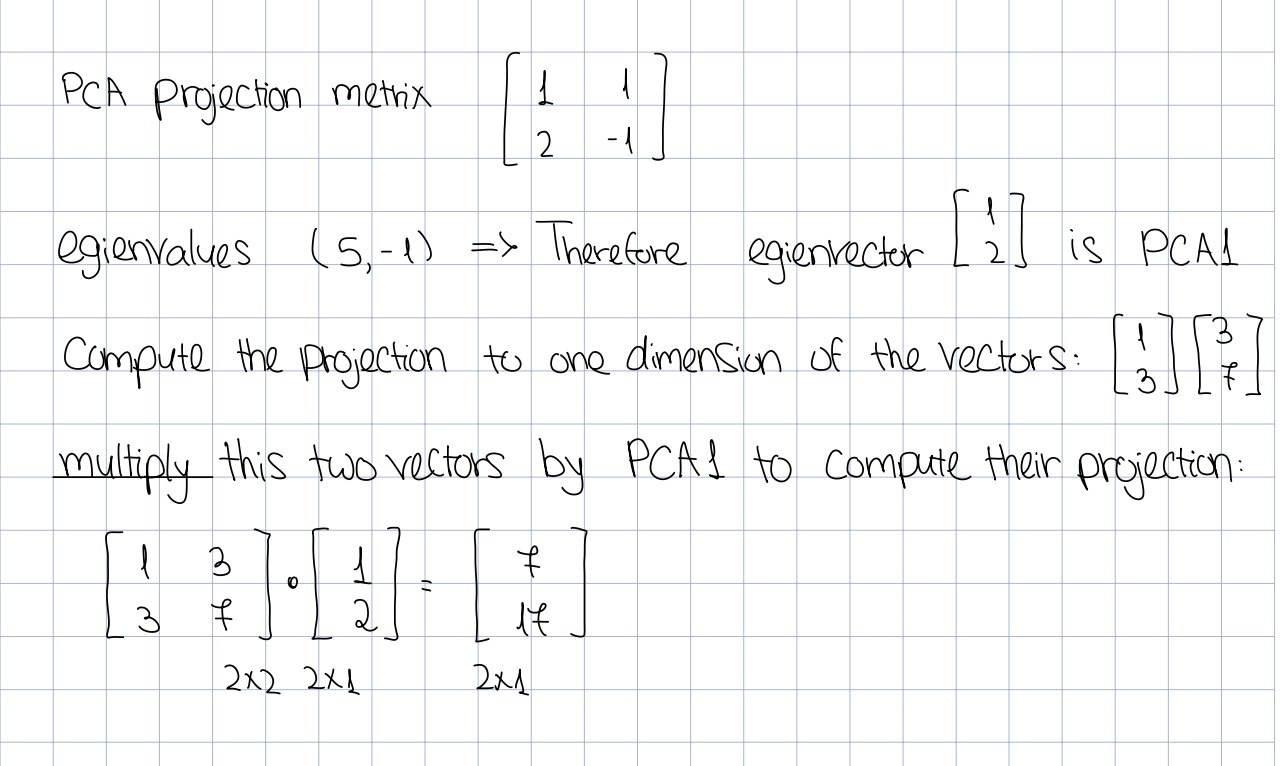